### Project Overview

- Analyze the dataset and its structure.
- Conduct exploratory data analysis (EDA).
- Identify key patterns and dependencies between features and the target variable.
- Model the target variable to uncover predictive relationships.
- Draw conclusions based on the modeling results.


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# load and open dataframe
data = pd.read_csv('train.csv')
data.sample()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
19725,194,443,487,271,326,422,2.44949,0.000687,1,205,...,9.279675,10.890911,6.226642,1.2173,4.575921,5.494997,13.057671,14.389759,4.827042,6.000687


In [22]:
# checking for missing values and duplicates
data.isna().any().any(), data.duplicated().any()

(False, False)

In [24]:
# checking for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [4]:
# statistics for target feature
data.target.describe()

count    90000.000000
mean        50.033981
std         28.897243
min          0.002634
25%         25.091903
50%         50.030705
75%         75.059454
max         99.999482
Name: target, dtype: float64

### Preliminary Dataset Insights

- **Data Types**: The dataset consists of 43 features stored as `float64` and 11 features stored as `int64`.
- **No Duplicates**: The dataset contains no duplicate rows, ensuring data integrity.
- **No Missing Values**: All entries are complete, with no missing values in any column.
- **Target Variable**: The target is a continuous variable (`float64`) ranging from 0 to 100, with a mean of ~50 and moderate variability (`std ≈ 28.90`), indicating its suitability for regression tasks. The target appears to be evenly distributed across this range, with no significant skewness. This suggests a diverse dataset where the target likely does not follow a normal distribution.


c:\Users\oftuadmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


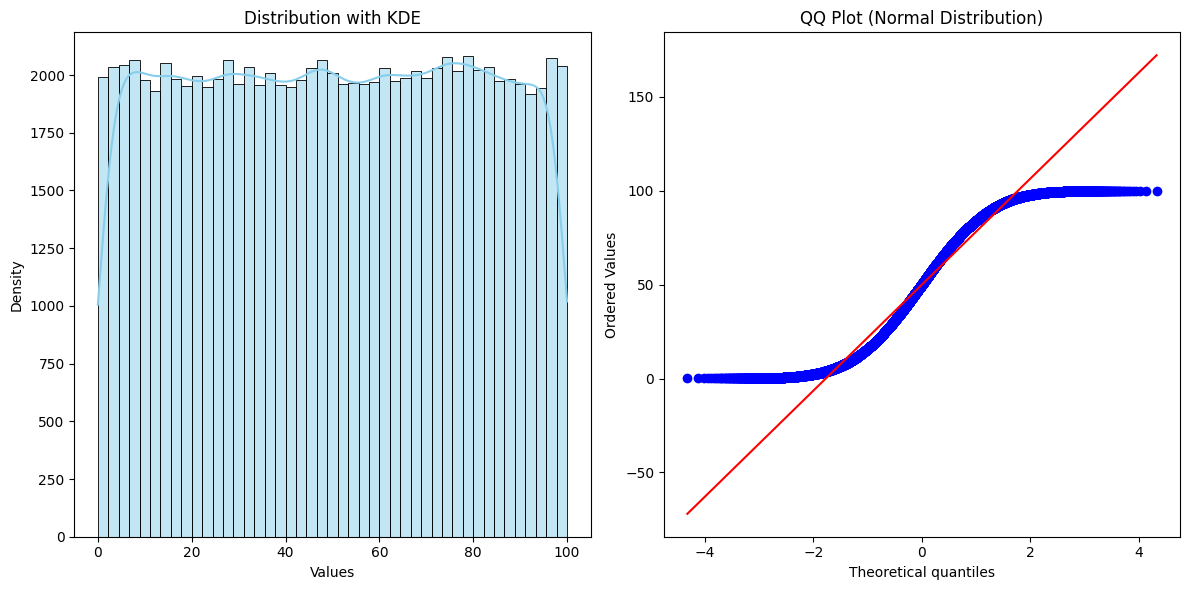

In [25]:
def plot_distribution_and_qq(data):
    """
    Plots a histogram with KDE and a QQ plot on a single horizontal canvas.
    
    Parameters:
    - data: array with your data (list, numpy array, pandas Series).
    """
    # Create a figure with two plots side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # First plot: histogram with KDE
    sns.histplot(data, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title('Distribution with KDE')
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Density')
    
    # Second plot: QQ plot
    stats.probplot(data, dist="norm", plot=axes[1])
    axes[1].set_title('QQ Plot (Normal Distribution)')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Call the function with the target data
plot_distribution_and_qq(data.target)


### Key Points:

1. The target variable is broadly and evenly distributed across the range of 0 to 100.
2. This does not represent a strict uniform distribution.
3. The QQ plot reveals significant deviations from normality, particularly in the tails.
4. The data does not follow a normal distribution.
5. The distribution indicates a diverse dataset with no clear concentration of values in specific regions.


### Next Steps:

1. The dataset contains 53 features, resulting in high dimensionality.
2. Reducing the feature space is a priority to improve model efficiency and interpretability.
3. Further analysis on the relationship between predictors and the target variable will be conducted after dimensionality reduction.
4. Recursive Feature Elimination (RFE) with cross-validation will be used to systematically identify and retain the most relevant features.


In [6]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV

# Initialize the DecisionTreeRegressor as the base estimator for feature selection
estimator = DecisionTreeRegressor()

# Set a random seed for reproducibility
SEED = 2020

# Define KFold cross-validation with 3 splits, shuffling the data, and setting the random seed
cv = KFold(n_splits=3, shuffle=True, random_state=SEED)

# Initialize RFECV (Recursive Feature Elimination with Cross-Validation)
selector = RFECV(
    estimator=estimator,            # Use the DecisionTreeRegressor as the model
    step=1,                         # Remove one feature at each iteration
    min_features_to_select=1,       # Ensure at least one feature remains
    cv=cv,                          # Perform cross-validation using KFold
    scoring='neg_mean_absolute_error',  # Evaluate model using negative mean absolute error
    verbose=2                       # Print progress during feature elimination
)

# Separate the target variable (y) from the feature matrix (X)
y = data.target
X = data.drop('target', axis=1)

# Fit the RFECV model to the data
selector = selector.fit(X, y)

# Get the indices of selected features
f = selector.get_support(1)

# Create a new DataFrame with only the selected features
X_new = X[X.columns[f]]

# Display the names of the selected features
X_new.columns


Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 fe

Index(['6', '7'], dtype='object')

### Key Insights:

1. The algorithm identified **two features** (`'6'` and `'7'`) as the most influential for predicting the target variable.
2. These features will be the focus of further analysis to understand their specific impact on the target.
3. Subsequent steps will involve exploring the relationship between these features and the target variable, potentially through visualization and statistical modeling.


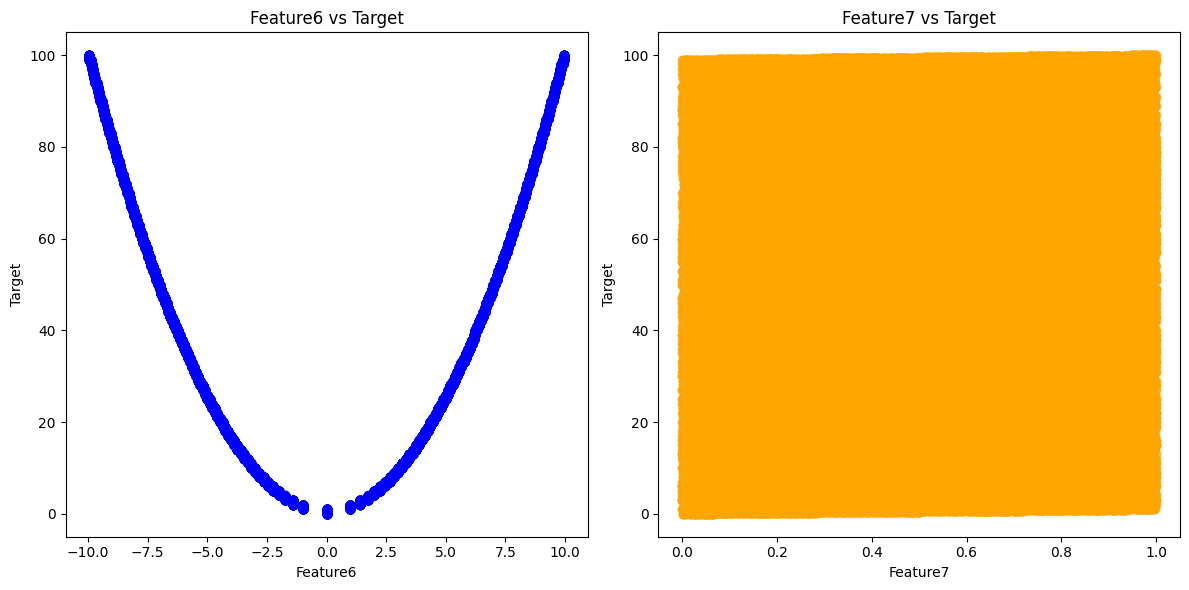

In [27]:
# Extract the relevant features and target
feature1 = data['6']
feature2 = data['7']
target = data['target']

# Create a figure with two subplots arranged horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot: Feature6 vs Target
axes[0].scatter(feature1, target, color='blue', alpha=0.7)
axes[0].set_xlabel('Feature6')
axes[0].set_ylabel('Target')
axes[0].set_title('Feature6 vs Target')

# Second plot: Feature7 vs Target
axes[1].scatter(feature2, target, color='orange', alpha=0.7)
axes[1].set_xlabel('Feature7')
axes[1].set_ylabel('Target')
axes[1].set_title('Feature7 vs Target')

# Adjust layout
plt.tight_layout()
plt.show()


### Key Observations:

1. **Feature 6 vs. Target**:
   - Shows a clear **parabolic relationship**.
   - Indicates a **polynomial dependency** of degree 2 with the target.

2. **Feature 7 vs. Target**:
   - Values are **uniformly distributed** across the target range.
   - No significant correlation or dependency observed.

### Conclusion:
- Focus on **polynomial modeling** for Feature 6 due to its strong relationship with the target.
- Feature 7 can be considered irrelevant for predicting the target.


In [29]:
# key statistics 
data[['6','target']].describe()

,6,target
count,90000.000000,90000.000000
mean,-0.011402,50.033981
std,7.038171,28.897243
min,-9.949874,0.002634
25%,-7.071068,25.091903
50%,0.000000,50.030705
75%,7.000000,75.059454
max,9.949874,99.999482


### Key Insights:

**Feature 6**:
   - Mean: **-0.011** — The feature is centered close to 0, indicating a balanced distribution around the origin.
   - Standard Deviation: **7.038** — Shows moderate variability in values.
   - Min/Max: **-9.95 to 9.95** — The feature spans a symmetric range, supporting its role in a polynomial relationship.
   - Median (50%): **0.000** — Half of the values are distributed symmetrically around 0.

### Conclusion:
Feature 6 exhibits a symmetric distribution centered around 0, supporting its polynomial dependency on the target. The target variable has a broad, evenly distributed range, indicating suitability for regression tasks with a focus on non-linear relationships.


In [31]:
# Attempting to find a polynomial dependency between Feature 6 and the target variable.
# The goal is to fit a polynomial regression model, extract its coefficients, and evaluate performance using R² and RMSE.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Extract the data
feature1 = data['6'].values.reshape(-1, 1)  # Feature 6
target = data['target'].values  # Target variable

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
feature1_poly = poly.fit_transform(feature1)

# Train the polynomial regression model
model = LinearRegression()
model.fit(feature1_poly, target)

# Output polynomial coefficients and intercept
print("Polynomial coefficients:", model.coef_)
print("Intercept (bias):", model.intercept_)

# Calculate the R² score
r2 = r2_score(target, model.predict(feature1_poly))
print(f"R² score for the polynomial regression: {r2}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(target, model.predict(feature1_poly)))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Polynomial coefficients: [ 0.00000000e+00 -8.42019341e-05  1.00002113e+00]
Intercept (bias): 0.4975002052175057
R² score for the polynomial regression: 0.9999002014928916
Root Mean Squared Error (RMSE): 0.2886795468849408


### Final Conclusions:

1. **Polynomial Coefficients**:
   - The quadratic term coefficient: **1.0000** — Confirms a strong parabolic relationship.
   - The linear term coefficient: **-0.00008** — Negligible contribution, consistent with a dominant quadratic dependency.
   - Intercept (bias): **0.4975** — Minor adjustment to fit the target variable's scale.

2. **Model Fit**:
   - **R² score: 0.9999** — Indicates an almost perfect fit, confirming that the polynomial model (degree 2) effectively explains nearly all the variance in the target variable.
   - **Root Mean Squared Error (RMSE)**: **0.2887**

### Summary:
Feature 6 exhibits a clear and strong quadratic relationship with the target variable, as reflected by the near-perfect R² score. This confirms that the selected polynomial regression model is well-suited for predicting the target using this feature.
